<a href="https://colab.research.google.com/github/esragonen/project418/blob/main/418_final_project_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## CEIT 418 Data Science Project

As your final data science project for CEIT 418, you will explore an educational dataset, and build a classification machine learning model. As the submission, you should submit in OdtuClass the following items:

1. The url of the Google Colab document, and
2. The PDF version of the complete notebook.

Submissions missing any of the files will not be evaluated.


In the first part, mostly you are expected to explore different tables (possible by using functions such as `head`, `shape`, `info`, and `describe`), deal with duplicate records and missing values, and perform some exploratory tasks.

In the second part, you will build a classification model and report its accuracy.


#### Important Information

For any action you take on the data, you should **explain your rationale** (e.g., I took into account colmuns X and Y when detecting duplicates because Z). Also, you should **provide an explanation/interpretation for outputs** produced by your code (e.g., based on this result, A and B columns can be dropped since they carry mostly missing values).

#### About the Dataset

For the final project, you will work on a public educational dataset shared by UK Open University. Although throughout this document you will be provided with sufficient information about this public dataset, you are strongly recommended to refer to https://analyse.kmi.open.ac.uk/open_dataset for more detailed information.

There is also Kaggle page where you can see some analysis performed shared by other publicly. I think they can be also helpful if you want to explore the dataset beyond this assignment.
https://www.kaggle.com/datasets/rocki37/open-university-learning-analytics-dataset
<br>
<br>

## 1. Exploratory Analysis

### 1.1. Courses Table

Courses table (`courses.csv`) contains the list of all available modules and their presentations.

The columns are:
* **code_module** – code name of the module, which serves as the identifier.
* **code_presentation** – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* **length** - length of the module-presentation in days.

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
courses = pd.read_csv("courses.csv")
print(courses.shape)
courses.head()


(22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


**TASK1:** Identify and treat duplicate/missing values (if there is any).

In [ ]:
print(courses.isna().sum())
print(courses.duplicated().sum())

# there are no duplicated or missing values

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
0


**TASK2:** Find out how many courses started in February vs October, and compare their length. Interpret the results.

In [ ]:
forj=courses[courses["code_presentation"].str.contains("J")]

forb=courses[courses["code_presentation"].str.contains("B")]

print(forj.shape[0],  forb.shape[0])

#there are 13 values for october and 9 values for februrary there are more values for october



13 9


### 1.2. Student Info Table

StudentInfo (`studentInfo.csv`) file contains **demographic** information about the students together with their final result. File contains the following columns:

* **code_module** – an identification code for a module on which the student is registered.
* **code_presentation** - the identification code of the presentation during which the student is registered on the module.
* **id_student** – a unique identification number for the student.
* **gender** – the student’s gender.
* **region** – identifies the geographic region, where the student lived while taking the module-presentation.
* **highest_education** – highest student education level on entry to the module presentation.
* **imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* **age_band** – band of the student’s age.
* **num_of_prev_attempts** – the number times the student has attempted this module.
* **studied_credits** – the total number of credits for the modules the student is currently studying.
* **disability** – indicates whether the student has declared a disability.
* **final_result** – student’s final result in the module-presentation.

In [ ]:
student = pd.read_csv("studentInfo.csv")
print(student.shape)
student.head()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**TASK1:** Identify and treat duplicate/missing values (if there is any)

In [ ]:
print(student.isna().sum())
print(student.duplicated().sum())

#there are plenty number of missing values so dropping 1111 lines is not a good approach, instead fill with most repeated value (mode)


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
0


In [ ]:
mode=student["imd_band"].mode()
# we get the mode as 20-30%
student['imd_band'].fillna("20-30%", inplace=True)
student["imd_band"].isna().sum()

0

**TASK2:** Treating categorical variables.

For this table, besides fixing any potential issue about duplicate/missing values, you are expected to explore the categorical variables: such as `highest_education`, `imd_band`, and `age_band`.

In particular, you may want to check if some categories of `highest_education`, `imd_band`, `age_band` variables (e.g., *Post Graduate Qualification* in `highest_education`) contain few instances. In such cases, you may need to merge the minority categories with a major category and even dedice to create a new set of (fewer) categories based on the existing ones. In some cases, you may even want to decide the reduce the number of categories (if you think they are many).

As long as you provide the rationale, you can decide such details by yourself. You should work on AT LEAST TWO categorical variables in this task.

In [ ]:
# FIRST CATEGORİCAL VARIABLE
# there are values which do not contain % in imd_band we need to add % to them


mask1=student.loc[student["imd_band"].str.contains("%")==False, "imd_band" ]

mask1.shape

(3516,)

In [ ]:
student["imd_band"].replace("10-20", "10-20%", inplace=True)
mask2=student.loc[student["imd_band"].str.contains("%")==False,"imd_band"]
mask2.shape

# there left no value that not containing "%"

(0,)

In [ ]:
# SECOND CATEGORİCAL VARİABLE

# according to my searchings post graduate qualification and HE qualification both have the same meanings so they should be taken as one variable

filter1 = student.loc[student["highest_education"].str.contains("Post")==True,"highest_education"]
filter1.shape


(313,)

In [ ]:
student["highest_education"].replace("Post Graduate Qualification", "HE Qualification", inplace=True)
filter2 = student.loc[student["highest_education"].str.contains("Post")==True,"highest_education"]
filter2.shape


(0,)

**TASK3:** Demographic Information and Performance Levels

More importantly for this table you are expected to explore various relationships between `final_result` and **at least three** categorical variable (e.g., did students with HE qualification perform better, did students with low `imd_band` withdraw more often, or did geographic region play any role? etc.). For this purpose you can visualize data and compute some basic statistics.

You must use at least two different chart types (e.g., bar or line or pie) to illustrate how the success/failure rates differ between different categories (e.g., education level, regions, imd_band, age, etc.). At least in one case, the chart should also denote the gender to illustrate the possible interaction between gender and the other categorical variable (e.g., do european females perform better than asian males -just an example :)).   


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'Number of Attempts')

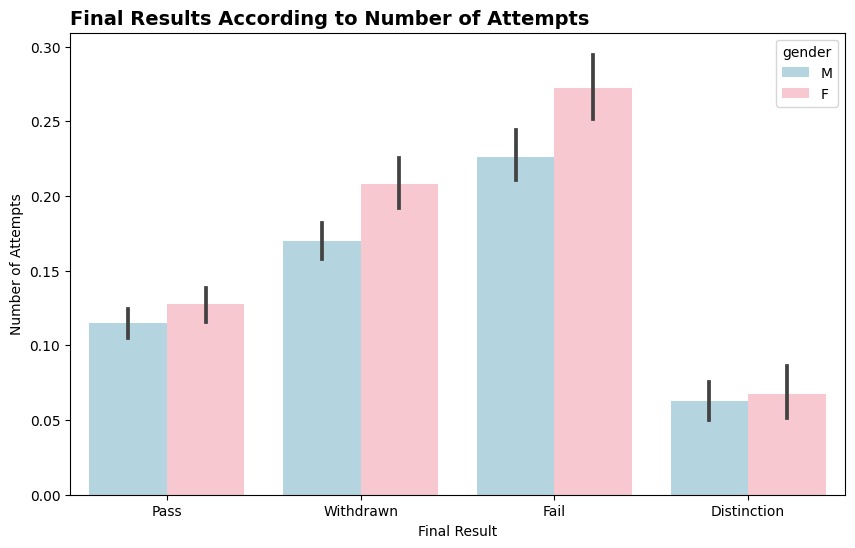

In [ ]:
# 1) association between final results and number of attempts for modules according to genders
plt.figure(figsize=(10,6))
sns.barplot(x='final_result', y='num_of_prev_attempts', hue='gender', data=student,  palette = ['lightblue','pink'])
plt.title('Final Results According to Number of Attempts',fontweight="bold",fontsize=14,loc="left")
plt.xlabel('Final Result' )
plt.ylabel('Number of Attempts')



Text(0, 0.5, 'final results with disability(yes/no)')

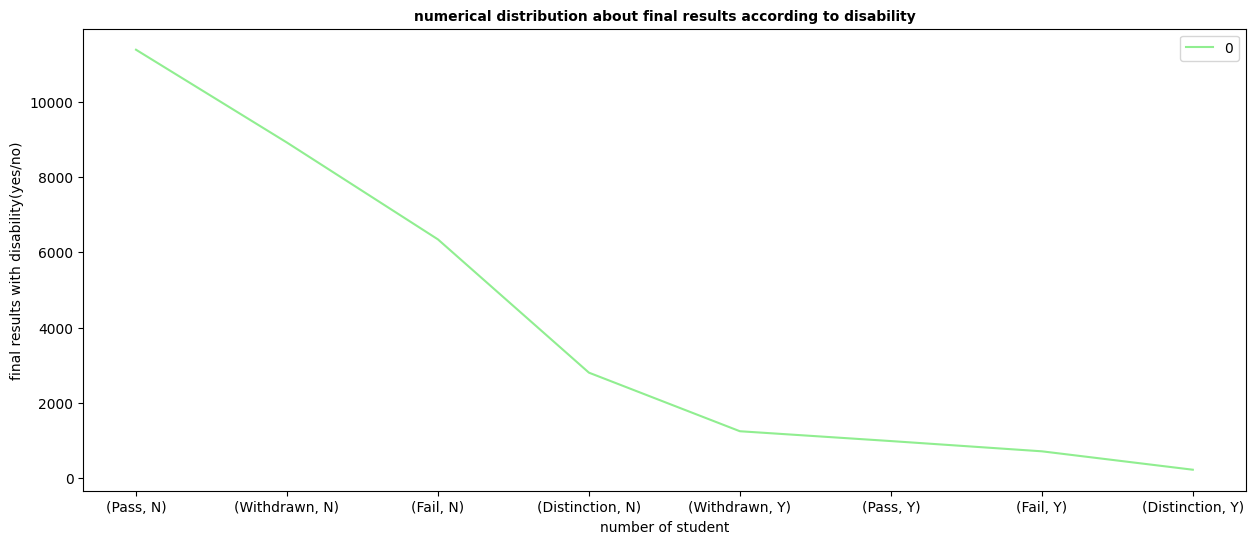

In [ ]:
# 2) association between disabilities and finas results

freq_table = pd.DataFrame(student[['final_result',"disability"]].value_counts())
freq_table
freq_table.reset_index()

freq_table.plot(kind="line", color="lightgreen", figsize = (15,6))
plt.title('numerical distribution about final results according to disability', fontweight="bold",fontsize=10)
plt.xlabel('number of student')
plt.ylabel('final results with disability(yes/no)')


# interpretation: in general people with no disabilities tend to pass

<Axes: ylabel='final_result,highest_education'>

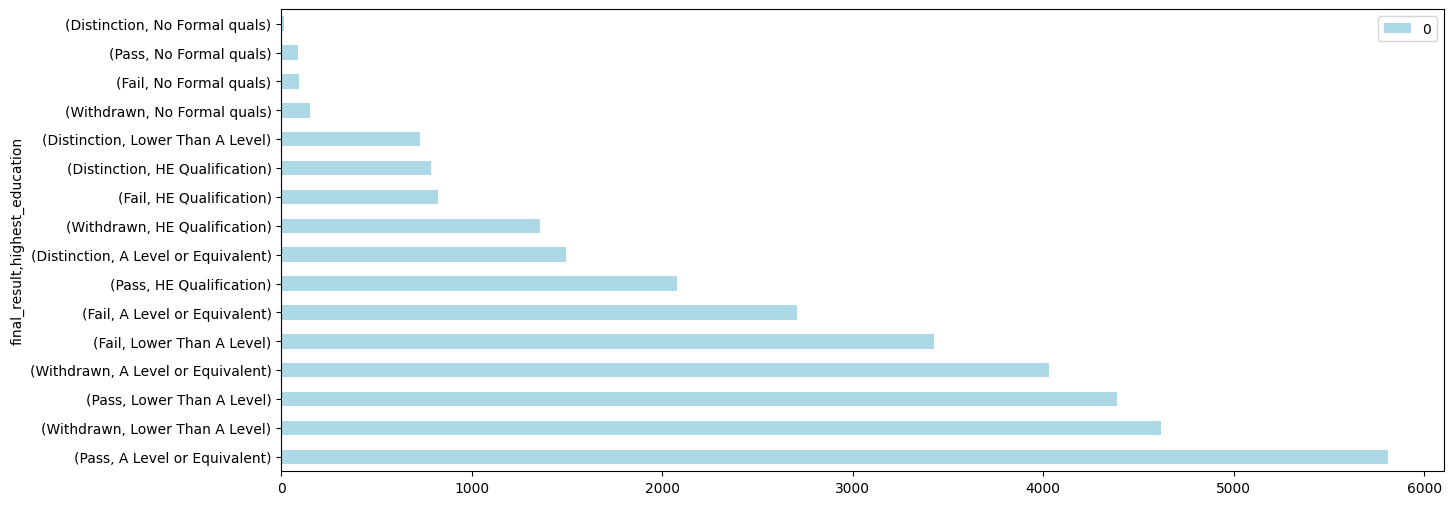

In [ ]:
# 3) association between success and education level

freq_table2 = pd.DataFrame(student[['final_result', "highest_education"]].value_counts())
freq_table2.plot(kind="barh", figsize = (15,6), color="lightblue")



### 1.3. Registration Table

Registration table (`studentRegistration.csv`) contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the presentation.
* **id_student** – a unique identification number for the student.
* **date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* **date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have *Withdrawal* as the value of the `final_result` column in the `studentInfo.csv` file.

In [ ]:
regist = pd.read_csv("studentRegistration.csv")
print(regist.shape)
regist.head()

(32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


**TASK1:** As the first task, you need to ensure that there are no conflicts between `studentRegistration.csv` and `studentInfo.csv` dataset in terms of **Withdrawal** status of *unregistered* students. For example, if a student unregistered from a course at some point (which can be found in "studentRegistration.csv"), his/her `final_result` should be **Withdrawal**.

In [ ]:
df1 = pd.read_csv('studentRegistration.csv')
df2 = pd.read_csv('studentInfo.csv')
df3 = df1.merge(df2, on=['id_student'], how='outer')
(df3[df3["final_result"]=="Withdrawn"].id_student==np.NAN).sum()

#yes there are no conflicts between two datasets since the output comes as zero

0

**TASK2:** Categorize students based on the day they registered for a course. In other words, you need to **bin** the registration data based on the `date_registration` column. Just to illustrate this idea, you can group students into categories such as "Very early birds", "early birds", "in-time", and "late-comers". You can use the categories given in this example or create your own categories.

In [ ]:
# to find the bin values look at the data structure
print(regist["date_registration"].max(),
regist["date_registration"].min(),
regist["date_registration"].median(),
regist["date_registration"].mean())

167.0 -322.0 -57.0 -69.4113002335013


In [ ]:
group_names = ["class oppenners",'early comers', 'late comers']
bins= [-330,-57,0,170]
register=pd.cut(regist["date_registration"], bins, labels=group_names)
register

0        class oppenners
1           early comers
2        class oppenners
3           early comers
4        class oppenners
              ...       
32588       early comers
32589       early comers
32590    class oppenners
32591       early comers
32592       early comers
Name: date_registration, Length: 32593, dtype: category
Categories (3, object): ['class oppenners' < 'early comers' < 'late comers']

**TASK3:** Categorize students based on the day they *unregistered* a course. In other words, you need to **bin** registration date based on the `date_unregistration` column. You are free to determine the number and the name of the categories (as in Task1).

In [ ]:
# to find the bin values look at the data structure
print(regist["date_unregistration"].max(),
regist["date_unregistration"].min(),
regist["date_unregistration"].median(),
regist["date_unregistration"].mean())

444.0 -365.0 27.0 49.757644956314536


In [ ]:
mask = regist[regist['date_unregistration'].isna()==False]
groupnames=["earlies", "close calls", "later comings"]
bins= [-365, 27, 49, 444]
unregister=pd.cut(mask["date_unregistration"], bins, labels=groupnames)
unregister


2              earlies
15       later comings
22       later comings
29       later comings
41       later comings
             ...      
32576    later comings
32577    later comings
32578    later comings
32586      close calls
32591    later comings
Name: date_unregistration, Length: 10072, dtype: category
Categories (3, object): ['earlies' < 'close calls' < 'later comings']

In [ ]:
regist["unreg. label"]=unregister
regist["regist. label"]=register
regist.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,unreg. label,regist. label
0,AAA,2013J,11391,-159.0,NaN,NaN,class oppenners
1,AAA,2013J,28400,-53.0,NaN,NaN,early comers
2,AAA,2013J,30268,-92.0,12.0,earlies,class oppenners
3,AAA,2013J,31604,-52.0,NaN,NaN,early comers
4,AAA,2013J,32885,-176.0,NaN,NaN,class oppenners


**TASK4:** Choose *THREE variables* from demographic data (`studentInfo.csv`), and explore if there is some relationship between students' registration/unregistration behaviour and the chosen demographic variables (e.g., did students from HE registered early? did male students unregistered sooner than female students?). You are free in exploring the data to answer similar questions that you determine. If you find no relationship, this is totally fine. Just remember that your analysis should be accompanied with meaningful interpretations.

In [ ]:
# to make it easier combine two dataframe

df = regist.merge(student, on=['id_student'], how='outer')
df.head()

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,unreg. label,regist. label,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,NaN,class oppenners,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,NaN,early comers,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,earlies,class oppenners,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,NaN,early comers,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,NaN,class oppenners,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
# first variable : gender and registration

pd.DataFrame(df[["regist. label", "gender"]].value_counts())


# male and female students tend to come to class early the proportion of late comers are so small compering to
# rest of the students

0
regist. label   gender       
class oppenners M       12295
early comers    M       11546
class oppenners F        8582
early comers    F        8025
late comers     F         172
                M         117

In [ ]:
# second variable : final results and unregistriation

df = pd.merge(regist, student, on='id_student')
pd.DataFrame(df.groupby(['final_result', 'regist. label']).size())

# in fail situation, unexpectedly students mostly class openers. almost all of the students who pass are coming early (class oppeners or early comers)
# maybe it can be said that coming early has an effect on passing
#in general, late comers are form minority of the students

0
final_result regist. label        
Distinction  class oppenners  1745
             early comers     1862
             late comers        16
Fail         class oppenners  3870
             early comers     4524
             late comers        74
Pass         class oppenners  7231
             early comers     7339
             late comers       109
Withdrawn    class oppenners  8031
             early comers     5846
             late comers        90

In [ ]:
# third variable : age band and unregistration

pd.DataFrame(df[["regist. label", "age_band"]].value_counts())


# students who have age between 0-35 tend to come to classes very early
# students who have age between 35-55 are mostly early comers
# ages 55 and more are minority of the age groups


0
regist. label   age_band       
class oppenners 0-35      15057
early comers    0-35      13695
                35-55      5740
class oppenners 35-55      5661
late comers     0-35        181
class oppenners 55<=        159
early comers    55<=        136
late comers     35-55       107
                55<=          1

### 1.4. Course Components Table

Course components table (`moodle.csv`) contains information about the available materials in the Moodle LMS. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The `moodle.csv` file contains the following columns:

* **id_site** – an identification number of the material.
* **code_module** – an identification code for module.
* **code_presentation** - the identification code of presentation.
* **activity_type** – the role associated with the module material.
* **week_from** – the week from which the material is planned to be used.
* **week_to** – week until which the material is planned to be used.

In [ ]:
moodle = pd.read_csv("moodle.csv")
print(moodle.shape)
moodle.head()

(6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


**TASK1:** In this dataset, some columns contain mainly missing values. Detect them and drop them to save space in the memory.

In [ ]:
print(moodle.isna().sum())
# there are 6364 rows and 5243 of them have na values at two variables if we drop the
# rows we lost so much data so ı drop the columns


moodle.dropna(axis=1,inplace=True)
moodle

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


**TASK2:** First identify the top 5 popular course component (`activity_type`) across all courses. Then, create a new table that displays how many times each of these popular components were included in each offering (`code_presentation`) of each course (`code_module`). Briefly interpret this table.

In [ ]:
# first five most popular activity_type
a=moodle["activity_type"].value_counts().head(5)
print(a)
print(a.index)

resource     2660
subpage      1055
oucontent     996
url           886
forumng       194
Name: activity_type, dtype: int64
Index(['resource', 'subpage', 'oucontent', 'url', 'forumng'], dtype='object')


In [ ]:
mask=pd.DataFrame(moodle[["activity_type" ,"code_presentation", "code_module"]].value_counts())
mask.loc[a.index]

# the most code presentation is resource module bbb
# the least code presentation is forumng module ggg
# forumung has least number of module


0
activity_type code_presentation code_module     
resource      2013B             BBB          236
              2013J             BBB          236
              2014B             BBB          231
              2013B             DDD          182
              2013J             DDD          178
...                                          ...
forumng       2013B             FFF            5
              2014J             BBB            3
              2013J             GGG            2
              2014J             GGG            2
              2014B             GGG            2

[107 rows x 1 columns]

Student activity data (`studentMoodleInteract.csv`) contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the module presentation.
* **id_student** – a unique identification number for the student.
* **id_site** - an identification number for the course material/component.
* **date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* **sum_click** – the number of times a student interacts with the material in that day.

In [ ]:
studentmoodleınfo = pd.read_csv("studentMoodleInteract.csv")
print(studentmoodleınfo.shape)
studentmoodleınfo.head()

(492567, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


**TASK1:** Display the total number of clicks for each course per each semester delivered. Besides a textual output, some visualizations must be provided for helping to interpret the data.

In [ ]:
df=pd.DataFrame(studentmoodleınfo[["code_module", "code_presentation", "sum_click" ]])
df


,code_module,code_presentation,sum_click
0,AAA,2013J,4.0
1,AAA,2013J,1.0
2,AAA,2013J,1.0
3,AAA,2013J,11.0
4,AAA,2013J,1.0
...,...,...,...
492562,BBB,2013B,2.0
492563,BBB,2013B,1.0
492564,BBB,2013B,4.0
492565,BBB,2013B,3.0


<Axes: title={'left': 'number of clicks for each course'}, xlabel='code_module', ylabel='sum_click'>

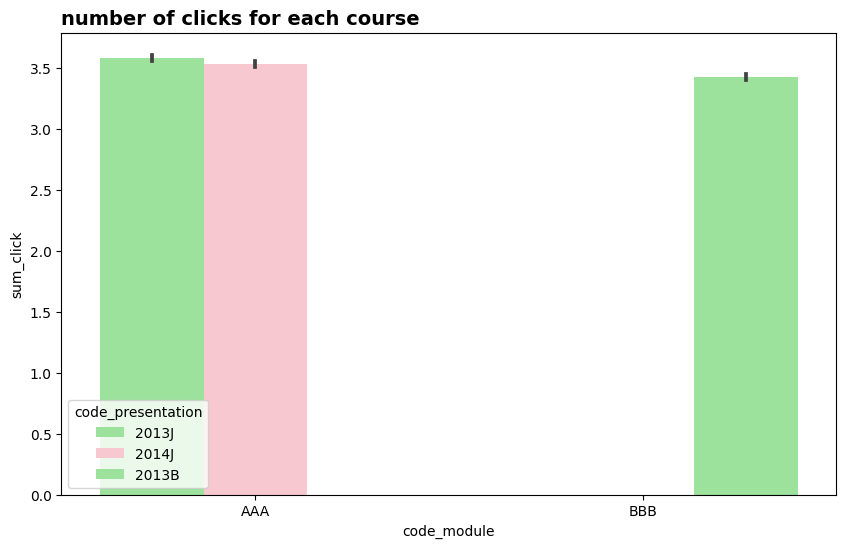

In [ ]:

plt.figure(figsize=(10,6))
plt.title('number of clicks for each course',fontweight="bold",fontsize=14,loc="left")
plt.xlabel('module code')
plt.ylabel('number of clicks')
sns.barplot(x='code_module', y='sum_click', hue='code_presentation', data=df, palette=["lightgreen", "pink"])


**TASK2**: As a follow up to the first task, identify the courses in which the total number of clicks is higher in 2014 than 2013. If the course was taught two times in the same year (such as, 2013B and 2013J) use the average of both semesters (`(2013B+2013J)/2`) to compare with the other year.

In [ ]:
mask=df.groupby(by=['code_module', 'code_presentation']).size()
mask.unstack()

# from the table it can be seen that 2013B has higher clicks for BBB and 2013J has higher clicks for AAA comparing to other semesters

code_presentation,2013B,2013J,2014J
code_module,,,
AAA,NaN,180982.0,169316.0
BBB,192013.0,NaN,NaN


**TASK3:** Which type of resources were mostly clicked by the students? Do you observe a common pattern accross courses (e.g., in almost all courses, clicks on `resource` is  higher than `quiz`)? A heatmap as a visualization might be helpful here.

In [ ]:
dff=studentmoodleınfo.merge(moodle)
dff
dff2=pd.DataFrame(dff.groupby(by=['code_module', 'sum_click', "activity_type"]).size())
dff2

0
code_module sum_click activity_type       
AAA         1.0       dataplus         248
                      forumng        39935
                      glossary         150
                      homepage       17625
                      oucollaborate    247
...                                    ...
BBB         291.0     forumng            1
            297.0     forumng            1
            300.0     forumng            1
            306.0     forumng            1
            319.0     forumng            1

[636 rows x 1 columns]

<Axes: xlabel='activity type', ylabel='number of clicks'>

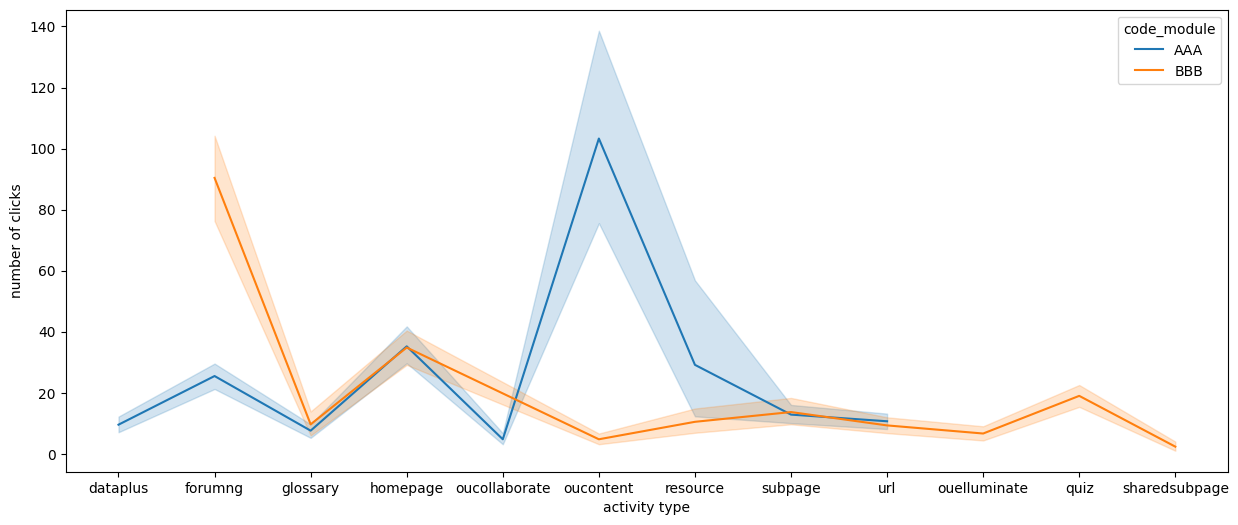

In [ ]:
plt.figure(figsize=(15,6))
plt.xlabel('activity type' )
plt.ylabel('number of clicks')
sns.lineplot( x="activity_type", y="sum_click", data=dff2, hue="code_module")

**TASK4:** For each student, compute the total number of clicks per each course component type (`activity_type` column in `moodle.csv`) separately for each course and semester. A simple representation of the expected table is provided below with fake data (note that in the given example columns and rows are incomplete).

| Student Id | code_module | code_presentation | PDF | Assignment
| --- | --- | --- | --- | --- |
| 1234 | AAA | 2013J | 23 | 33 |
| 1234 | BBB | 2014B | 5 | 42 |
   
Note that, in this task you actually create some features that can be used for predictive modeling.

In [ ]:
pivot_table = dff.pivot_table(index=['id_student', 'code_module', 'code_presentation'],
                                  columns='activity_type',
                                  values='sum_click',
                                  fill_value=0)

pivot_table

,,activity_type,dataplus,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,quiz,resource,sharedsubpage,subpage,url
id_student,code_module,code_presentation,,,,,,,,,,,,
6516.0,AAA,2014J,5.25,2.577143,0.0,3.145570,0.0,8.179348,0.0,0.000,1.631579,0,1.958904,2.918367
11391.0,AAA,2013J,0.00,3.711538,0.0,3.450000,0.0,7.089744,0.0,0.000,1.181818,0,2.909091,1.250000
23629.0,BBB,2013B,0.00,2.846154,0.0,2.428571,0.0,0.000000,0.0,0.000,1.000000,0,2.500000,0.000000
24734.0,AAA,2014J,0.00,2.194444,0.0,2.555556,1.0,2.476923,0.0,0.000,1.000000,0,1.080000,1.125000
25107.0,BBB,2013B,0.00,3.800000,0.0,2.571429,0.0,1.000000,0.0,2.375,1.000000,0,2.000000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692384.0,BBB,2013B,0.00,2.555556,0.0,3.724138,0.0,3.000000,0.0,1.000,1.488889,0,3.303030,4.000000
2692514.0,AAA,2014J,3.00,3.743136,0.0,6.812274,0.0,2.530864,0.0,0.000,1.000000,0,1.661290,0.000000
2694424.0,AAA,2013J,0.00,3.389946,0.0,5.199029,0.0,2.554745,0.0,0.000,1.757576,0,1.692308,1.743590


**TASK5:** Using proper visualizations and statistical analysis, please explore if there is any relationship between students' course performance (`final_result` column in `studentInfo.csv`) and clicks on different resources.

In [ ]:
dataframe= student.merge(dff)
dataframe

dff3=pd.DataFrame(dataframe.groupby(by=['final_result', 'sum_click', "activity_type"]).size())
dff3

0
final_result sum_click activity_type      
Distinction  1.0       dataplus         35
                       forumng        8707
                       glossary         66
                       homepage       2177
                       oucollaborate    21
...                                    ...
Withdrawn    94.0      oucontent         1
             101.0     homepage          1
             171.0     forumng           1
             274.0     forumng           1
             288.0     forumng           1

[1241 rows x 1 columns]

<Axes: xlabel='activity type', ylabel='number of clicks'>

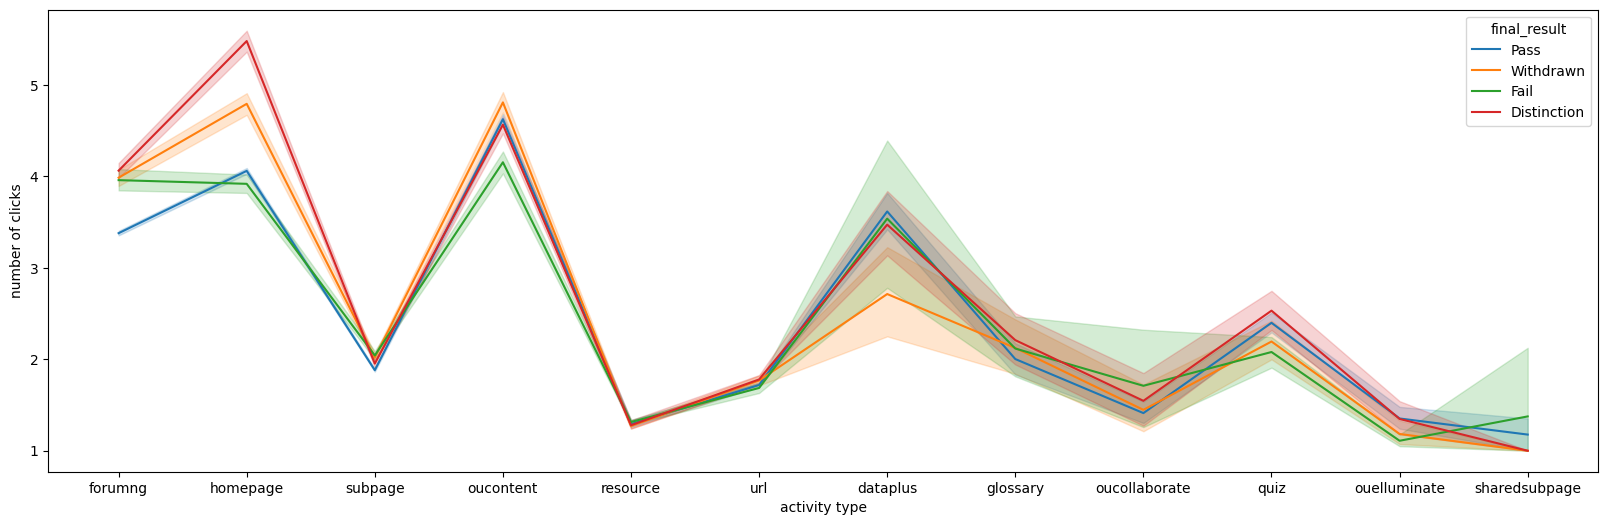

In [ ]:
plt.figure(figsize=(20,6))
plt.xlabel('activity type' )
plt.ylabel('number of clicks')
sns.lineplot( x="activity_type", y="sum_click", data=dataframe, hue="final_result")

<Axes: xlabel='activity_type', ylabel='sum_click'>

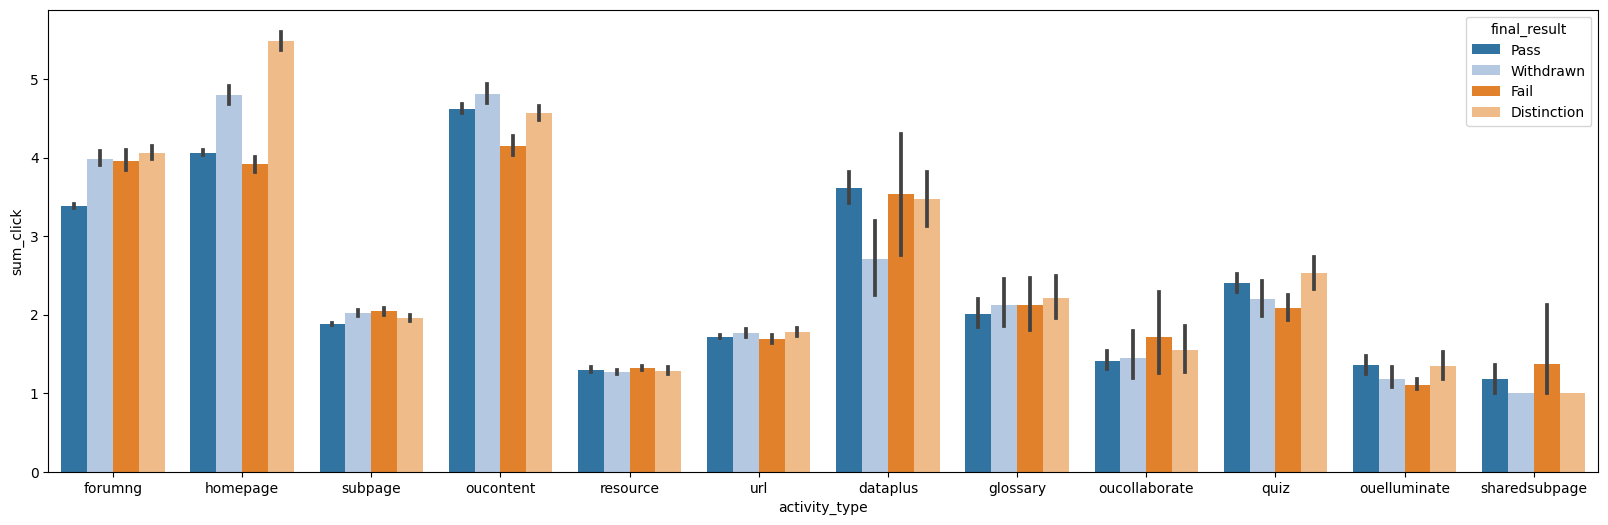

In [ ]:
# another visulization
plt.figure(figsize=(20,6))
plt.xlabel('activity type' )
plt.ylabel('number of clicks')
sns.barplot( x="activity_type", y="sum_click", data=dataframe, hue="final_result", palette="tab20")

In [ ]:
# in these task we mainly work with categorical variables because of that ı prefer to use barh, bar and line plots.
# because scatter, box and etc. are better choises for numerical variables.

## 2. Predictive Modeling

In this section, you will build a machine learning model to predict students' final course outcome (`final_result` column in `studentInfo.csv`). That is, whether student is 'Pass', 'Withdrawn', 'Fail', or 'Distinction'. If you consider the number of students in some of these categories are too few, you can combine them into a new category.

### 2.1. Generate Features from Demographic Information

In Section 1.2, you explored demographic data about students and tuned some categorical variables. From these categorical variables, please generate *at least* **10** *dummy* variables to be used for predictors in the machine learning model.

In [ ]:
categorical_columns = ['gender', 'highest_education', 'imd_band', 'disability']
dummy = pd.get_dummies(student[categorical_columns])
dummy



,gender_F,gender_M,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,imd_band_0-10%,imd_band_10-20%,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,disability_N,disability_Y
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
32589,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
32590,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
32591,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
student_info_with_dummies = pd.concat([student, dummy], axis=1)

d= pd.DataFrame(student_info_with_dummies)
d

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,disability_N,disability_Y
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,0,0,0,0,0,0,1,1,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,1,0,0,0,0,0,0,0,1,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0,1,0,0,0,0,0,0,0,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0,0,0,1,0,0,0,0,1,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,...,0,0,0,0,0,0,0,0,1,0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0,0,1,0,0,0,0,0,1,0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,1,0,0,0,0,0,0,0,0,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0,0,0,0,0,0,0,1,1,0


### 2.2. Generate/Select Features from Click Data

In Section 1.5, you have already created some features from students' click behaviour. You can use all of them here as additional predictors.

Additionally, you should create *at least* **3** features indicating the engagement level of students at different course components. Some example features are provided below :

* a dummy variable that indicates if students clicked at least three types of course components or not,
* each student's average number of clicks across all components per a single course and semester,
* a dummy variable indicating if students clicked all types of course components.

There is no limit in the type and number of additional feature you can generate from the click data.

In [ ]:
# 1) a dummy variable for indicating how many times the students who pass interact with the courses
bin=[0,3.5,664,1326]
a = dataframe.loc[dataframe["final_result"].str.contains("Pass")==True,"sum_click"]

cat=pd.cut(a, bin)
pd.get_dummies(cat)

,"(0.0, 3.5]","(3.5, 664.0]","(664.0, 1326.0]"
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
492561,1,0,0
492562,1,0,0
492563,1,0,0
492564,1,0,0


In [ ]:
# 2) average clicks per course for each student

dataframe['total_click'] = dataframe.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].transform('sum')
dataframe['total_components'] = dataframe.groupby(['id_student', 'code_module', 'code_presentation'])['activity_type'].transform('nunique')
dataframe['average_clicks_per_course'] = dataframe['total_click'] / dataframe['total_components']

cat=pd.qcut(dataframe['average_clicks_per_course'], 4)
pd.get_dummies(cat)

,"(0.999, 86.5]","(86.5, 228.0]","(228.0, 444.125]","(444.125, 1964.5]"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
492561,1,0,0,0
492562,1,0,0,0
492563,1,0,0,0
492564,1,0,0,0


In [ ]:
# 3) total clicks with respect to highest education level for each student


dataframe['total_click_wrt_he'] = dataframe.groupby(['id_student', 'highest_education'])['sum_click'].transform('sum')
dataframe

cat=pd.qcut(dataframe['total_click_wrt_he'], 4)
pd.get_dummies(cat)

,"(0.999, 615.0]","(615.0, 1734.0]","(1734.0, 3501.0]","(3501.0, 15716.0]"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
492561,1,0,0,0
492562,1,0,0,0
492563,1,0,0,0
492564,1,0,0,0


### 2.3. Training and Testing the Model

As the last activity in this project, you are expected to train and test a logistic regression model for predicting students' final course status. You should use 10-fold cross-validation.

Interpret the results based on confusion matrix and AUC scores. In your interpretation, please also mention the features with high predictive power and those with low predictive power.

Please note that the achieving low/high accuracy in the predictions has no importance for your grade.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
maskdata = dataframe[["final_result", "sum_click"]]
maskdata.head()

,final_result,sum_click
0,Pass,1.0
1,Pass,1.0
2,Pass,5.0
3,Pass,7.0
4,Pass,6.0


In [ ]:
X = maskdata.drop('final_result', axis=1)  # Features
y = maskdata['final_result']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6726861156789898
Confusion Matrix:
[[    1     0 12777     0]
 [    1     0  9179     0]
 [    7     0 66268     0]
 [    2     0 10279     0]]
Classification Report:
              precision    recall  f1-score   support

 Distinction       0.09      0.00      0.00     12778
        Fail       0.00      0.00      0.00      9180
        Pass       0.67      1.00      0.80     66275
   Withdrawn       0.00      0.00      0.00     10281

    accuracy                           0.67     98514
   macro avg       0.19      0.25      0.20     98514
weighted avg       0.46      0.67      0.54     98514



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#interpretations :
#the accuracy level of the regression model approximetly 67.26%
#the regression model has high accuracy(it is way bigger than 50%)
#but cannot predict distinction, fail, withdrawn wery well
#pass dominates the dataset so it becomes biassed
#so it effects overall accuracy